<a href="https://colab.research.google.com/github/Tatoloops/PublicRepository/blob/PyNotebook/Python/Taller3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller 3

* Integrantes:
> Tomás Castillo Ávila

## Selección del conjunto de datos

El Conjunto de datos seleccionado se titula "gdp_over_hours_worked". El cual es un conjunto de datos que estudia la economía mundial.
Este conjunto de datos fue seleccionado para estudiar y comprender mejor el estado de la economía en países latinoamericanos particulares. Ver el crecimiento o decrecimiento poblacional, económico y estimar el posible futuro económico del continente.  
Los datos estadísticos pueden ayudar a estimar el futuro económico, predecir y preveer caídas económicas.

In [3]:
from google.colab import files

dataUpload = files.upload()

for fn in dataUpload.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(dataUpload[fn])))

Saving gdp_over_hours_worked.xlsx to gdp_over_hours_worked.xlsx
User uploaded file "gdp_over_hours_worked.xlsx" with length 2243786 bytes


## Uso de pandas para leer y manipular datos

> Se crea la función "dataFrame", la cual será en handler de nuestro data frame.

In [4]:
import pandas as pd

dataFrame = pd.read_excel(next(iter(dataUpload.keys())))

> Manipulamos un poco nuestro DataFrame, eliminando columnas que no se analizarán, así como filas que contienen elementos nulos.

In [5]:
def delete_column(dataframe, column_name):
    if column_name in dataframe.columns:
        dataframe = dataframe.drop(column_name, axis=1)
        print(f"Column '{column_name}' deleted successfully.")
    else:
        print(f"Column '{column_name}' not found in the DataFrame.")

    return dataframe

def delete_rows_with_na(dataframe, column_name):
    if column_name in dataframe.columns:
        dataframe = dataframe.dropna(subset=[column_name])
        print(f"Rows with NA in column '{column_name}' deleted successfully.")
    else:
        print(f"Column '{column_name}' not found in the DataFrame.")

    return dataframe


dataFrame = delete_column(dataFrame, 'iso2c')
dataFrame = delete_column(dataFrame, 'iso3c')
dataFrame = delete_column(dataFrame, 'working_age_pop_pct')
dataFrame = delete_column(dataFrame, 'employment_rate')
dataFrame = delete_column(dataFrame, 'hours_worked')
dataFrame = delete_column(dataFrame, 'total_hours')
dataFrame = delete_column(dataFrame, 'hours_per_employed')
dataFrame = delete_column(dataFrame, 'employed')
dataFrame = delete_column(dataFrame, 'total_hours_alternative')
dataFrame = delete_column(dataFrame, 'gdp_over_k_hours_worked')
dataFrame = delete_column(dataFrame, 'gdp_ppp_over_k_hours_worked')
dataFrame = delete_column(dataFrame, 'gdp_ppp_over_k_hours_worked_c')

dataFrame = delete_rows_with_na(dataFrame, 'pop')
dataFrame = delete_rows_with_na(dataFrame, 'labor_force')
dataFrame = delete_rows_with_na(dataFrame, 'gdp_ppp_c')
dataFrame = delete_rows_with_na(dataFrame, 'gdp_ppp')
dataFrame = delete_rows_with_na(dataFrame, 'gdp')
dataFrame = delete_rows_with_na(dataFrame, 'gdp_c')
dataFrame = delete_rows_with_na(dataFrame, 'unemployment_r')
dataFrame = delete_rows_with_na(dataFrame, 'pop_over_65')
dataFrame = delete_rows_with_na(dataFrame, 'gdp_over_pop')
dataFrame = delete_rows_with_na(dataFrame, 'gdp_ppp_over_pop')
dataFrame = delete_rows_with_na(dataFrame, 'gdp_ppp_over_labor_force')
dataFrame = delete_rows_with_na(dataFrame, 'gdp_ppp_over_pop_c')
dataFrame = delete_rows_with_na(dataFrame, 'gdp_over_pop_c')


print("\nDataFrame después de eliminar filas y columnas incompletas:")
print(dataFrame)

Column 'iso2c' deleted successfully.
Column 'iso3c' deleted successfully.
Column 'working_age_pop_pct' deleted successfully.
Column 'employment_rate' deleted successfully.
Column 'hours_worked' deleted successfully.
Column 'total_hours' deleted successfully.
Column 'hours_per_employed' deleted successfully.
Column 'employed' deleted successfully.
Column 'total_hours_alternative' deleted successfully.
Column 'gdp_over_k_hours_worked' deleted successfully.
Column 'gdp_ppp_over_k_hours_worked' deleted successfully.
Column 'gdp_ppp_over_k_hours_worked_c' deleted successfully.
Rows with NA in column 'pop' deleted successfully.
Rows with NA in column 'labor_force' deleted successfully.
Rows with NA in column 'gdp_ppp_c' deleted successfully.
Rows with NA in column 'gdp_ppp' deleted successfully.
Rows with NA in column 'gdp' deleted successfully.
Rows with NA in column 'gdp_c' deleted successfully.
Rows with NA in column 'unemployment_r' deleted successfully.
Rows with NA in column 'pop_over_

## Visualización de datos con seaborn y matplotlib

> Se importan las librerías necesarias para la visualización de los datos.

In [83]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

Se crean gráficos de barras con matplotlib:
> Estos gráficos compararán la población, la economía y el porcentaje de desempleo entre Chile, argentina y Perú a lo largo de los años.

> Como se construyo sobre una función, los años a comparar pueden ser arbitrarios, así como los países y criterios a comparar.

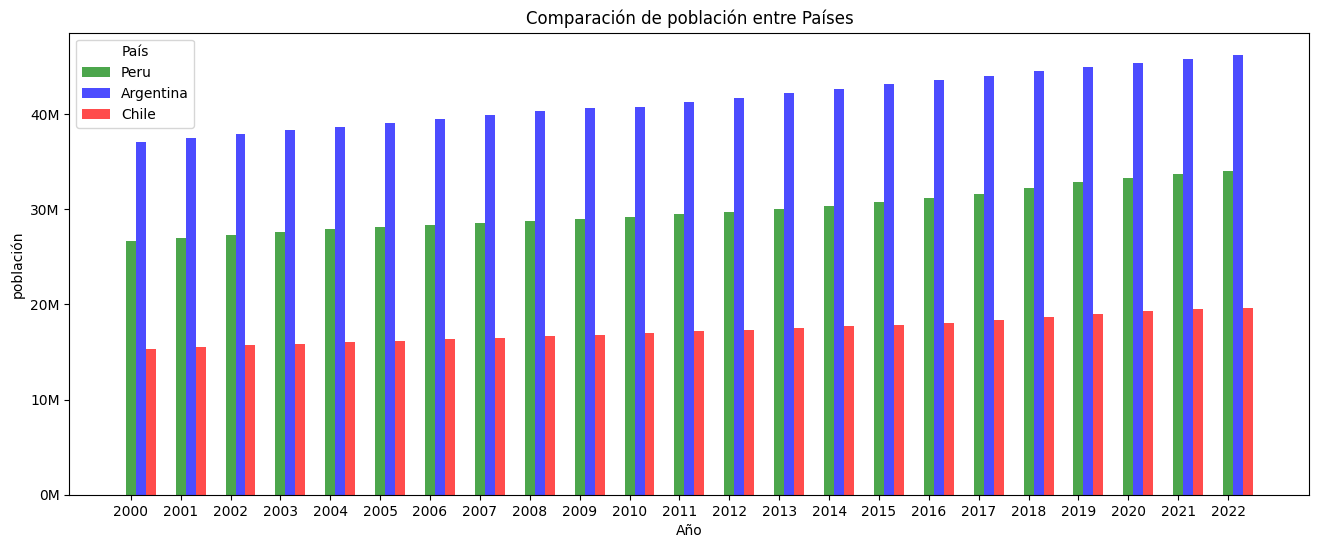

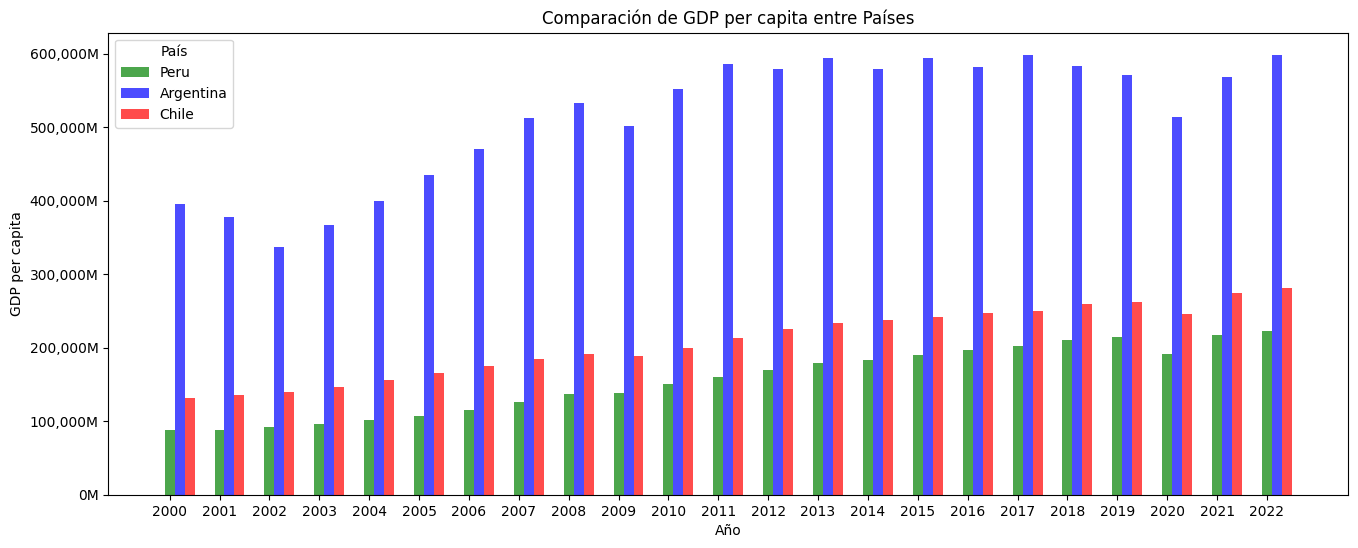

ingrese el año de inicio (1991 - 2022): 1991
ingrese el año de término (1991 - 2022): 2022


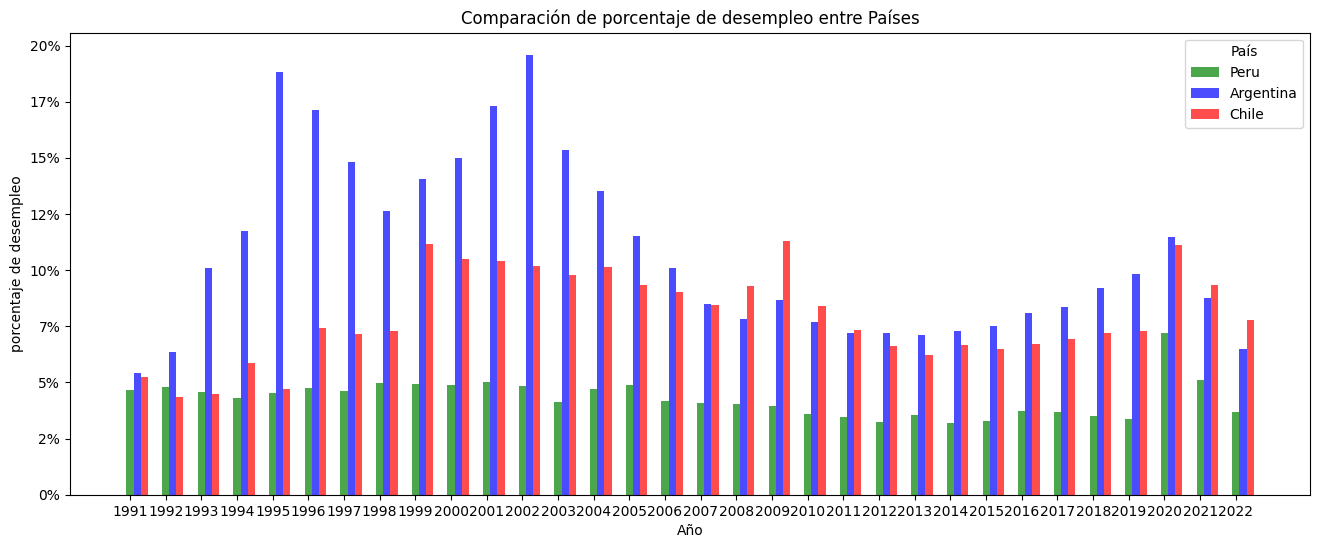

In [91]:
def data_comparison(data, year_start, year_end, country_list, column_to_compare):
    # Filtrar el DataFrame según el rango de años y la lista de países
    filtered_data = data[(data['year'] >= year_start) & (data['year'] <= year_end) & (data['country'].isin(country_list))]

    # Colores personalizados para cada país
    country_colors = {'Peru': 'green', 'Argentina': 'blue', 'Chile': 'red'}

    # Crear el gráfico de barras
    fig, ax = plt.subplots(figsize=(16, 6))

    # Barra para cada país en cada año
    for i, country in enumerate(country_list):
        subset_data = filtered_data[filtered_data['country'] == country]
        ax.bar(subset_data['year'] + 0.2 * i, subset_data[column_to_compare], width=0.2, label=country, color=country_colors[country], alpha=0.7)

    # Configurar etiquetas en el eje X
    ax.set_xticks(np.arange(year_start, year_end + 1))
    ax.set_xticklabels(np.arange(year_start, year_end + 1))

    # Configurar etiquetas y formatear tipo de valores sobre el eje Y
    if column_to_compare == "pop":
        columnName = "población"
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1e6):,}M'))
    elif column_to_compare == "gdp_c":
        columnName = "GDP per capita"
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1e6):,}M'))
    elif column_to_compare == "unemployment_r":
        columnName = "porcentaje de desempleo"
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}%'))

    # Configurar etiquetas y leyenda
    ax.set_xlabel('Año')
    ax.set_ylabel(f'{columnName}')
    ax.set_title(f'Comparación de {columnName} entre Países')
    ax.legend(title='País')

    # Mostrar el gráfico
    plt.show()

# Generando gráficos
data_comparison(dataFrame, 2000, 2022, ['Peru', 'Argentina', 'Chile'], 'pop')
data_comparison(dataFrame, 2000, 2022, ['Peru', 'Argentina', 'Chile'], 'gdp_c')

year0 = int(input("ingrese el año de inicio (1991 - 2022): "))
year1 = int(input("ingrese el año de término (1991 - 2022): "))

data_comparison(dataFrame, year0, year1, ['Peru', 'Argentina', 'Chile'], 'unemployment_r')


> Los siguientes gráficos de burbujas tienen distintos criterios a comparar, entre ellos están:
- gdp: en sencillas palabras, representa el ingreso bruto del país
- pop: población.
- gdp_over_pop: representa el ingreso bruto del país dividido por la población, estima un promedio económico independiente de la población, un tipo de densidad económica.
-unemployment_r: porcentaje de desempleo.

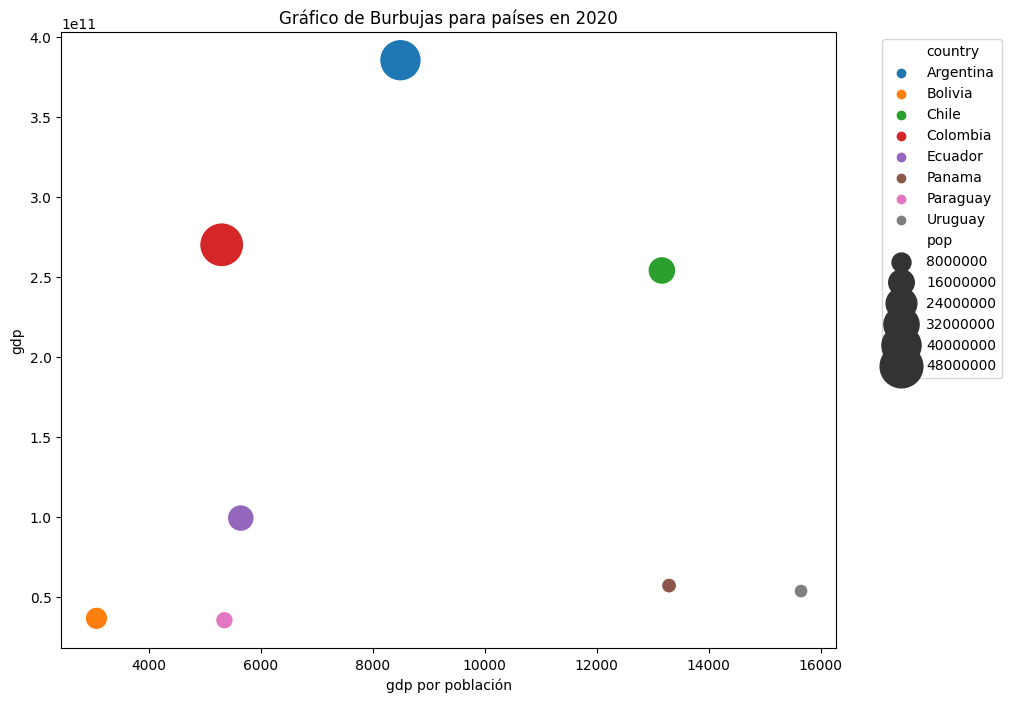

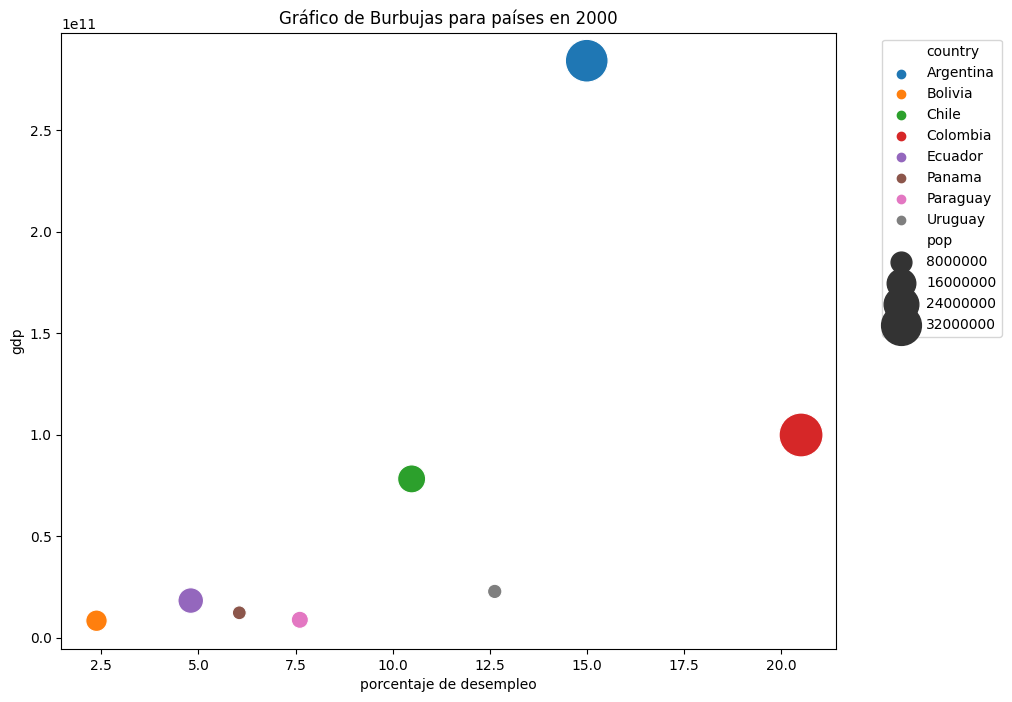

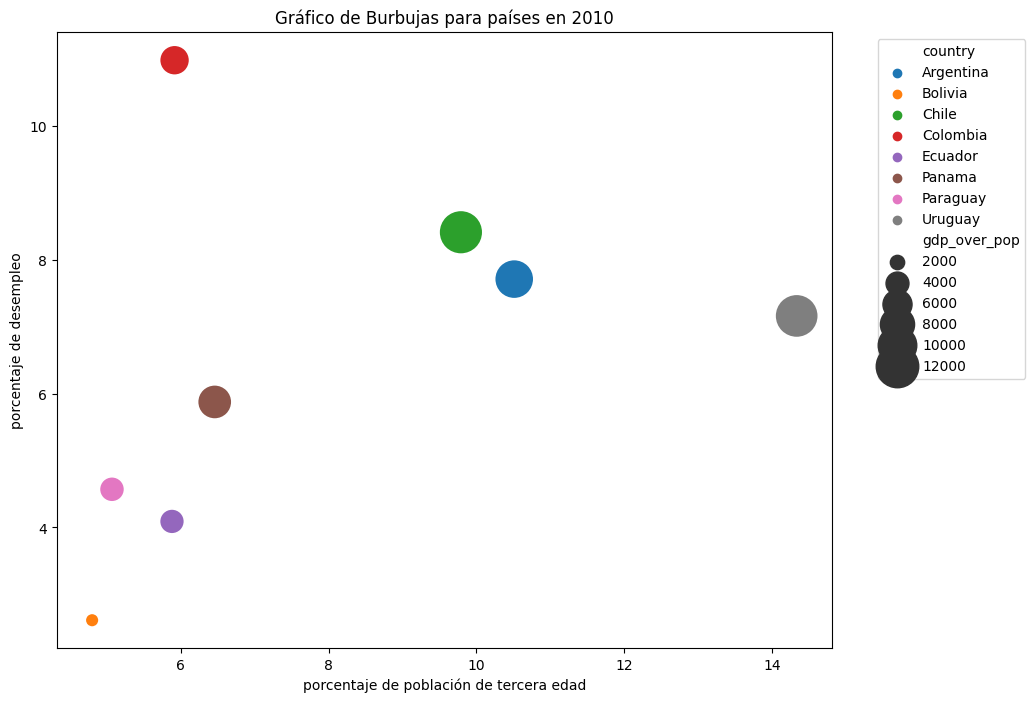

In [103]:
def EtiquetarAxis (axis):
  if axis == "pop":
    return "población"
  elif axis == "gdp":
    return "gdp"
  elif axis == "unemployment_r":
    return "porcentaje de desempleo"
  elif axis == "pop_over_65":
    return "porcentaje de población de tercera edad"
  elif axis == "gdp_over_pop":
    return "gdp por población"

def ConstruirGraficoBurbuja(dataFrame,year,country_list,xParam,yParam,radius):
  df_filtrado = dataFrame[(dataFrame['country'].isin(country_list)) & (dataFrame['year'] == year)]

  # Crear el gráfico de burbujas con Seaborn
  plt.figure(figsize=(10, 8))
  ax= sns.scatterplot(x=xParam, y=yParam, size=radius, hue='country', data=df_filtrado, sizes=(100, 1000), legend="auto")

  handles, labels = ax.get_legend_handles_labels()
  ax.legend(handles=handles[1:], labels=labels[1:], title='country', bbox_to_anchor=(1.05, 1), loc='upper left')

  # Añadir etiquetas y título
  plt.xlabel(EtiquetarAxis(xParam))
  plt.ylabel(EtiquetarAxis(yParam))
  plt.title(f'Gráfico de Burbujas para países en {year}')

  # Mostrar el gráfico
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.show()


latinoamerica= ["Chile",
                "Argentina",
                "Perú",
                "Colombia",
                "Uruguay",
                "Ecuador",
                "Venezuela",
                "Bolivia",
                "Paraguay",
                "Panama",]
ConstruirGraficoBurbuja(dataFrame,2020,latinoamerica,"gdp_over_pop","gdp","pop")
ConstruirGraficoBurbuja(dataFrame,2000,latinoamerica,"unemployment_r","gdp","pop")
ConstruirGraficoBurbuja(dataFrame,2010,latinoamerica,"pop_over_65","unemployment_r","gdp_over_pop")

> Los siguientes mapas de calor, establecen una relación entre tres variables, las cuales pueden ser, el desempleo, la economía, la población, porcentaje de población de la tercera edad, las cuales son comparadas en Chile y argentina a lo largo del tiempo.

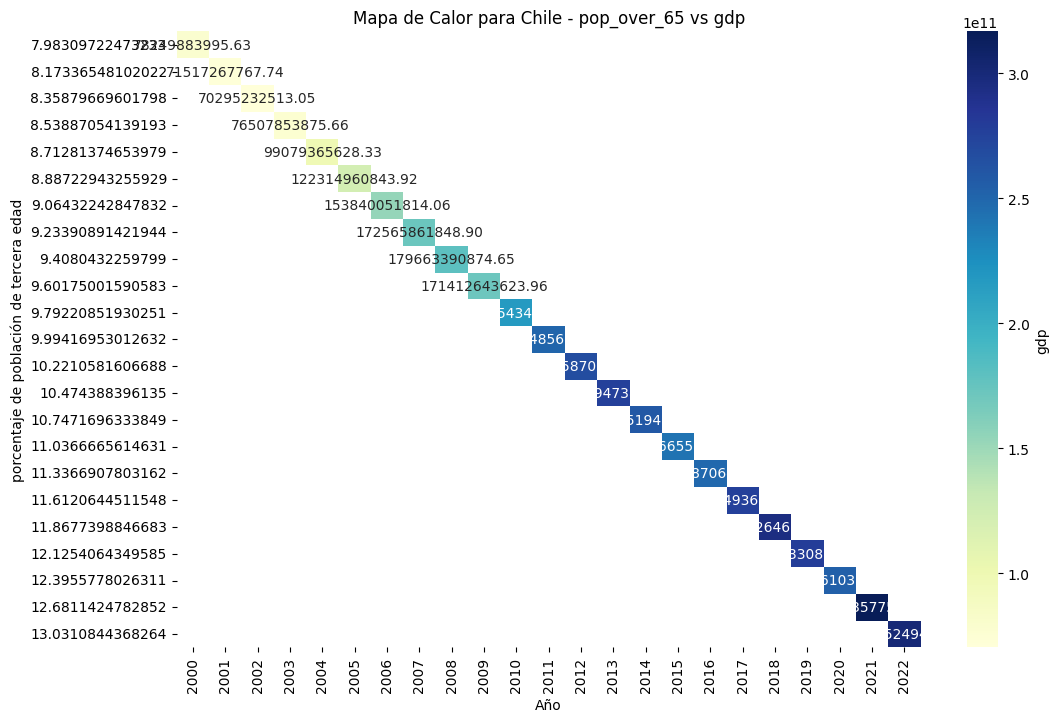

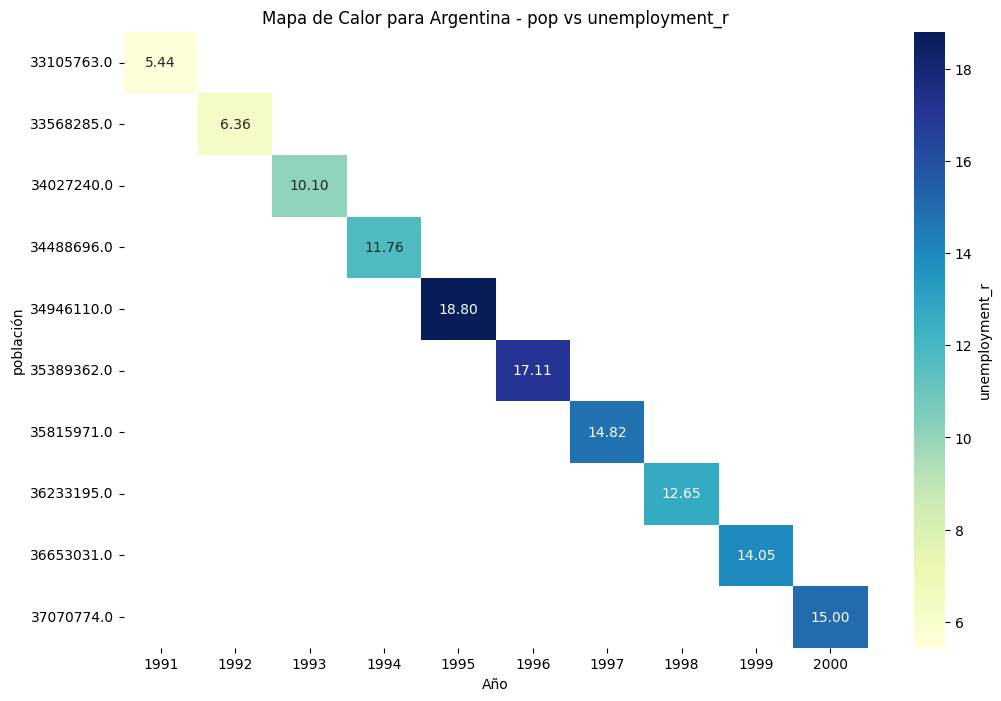

In [88]:
def EtiquetarAxis (axis):
  if axis == "pop":
    return "población"
  elif axis == "gdp":
    return "gdp"
  elif axis == "unemployment_r":
    return "porcentaje de desempleo"
  elif axis == "pop_over_65":
    return "porcentaje de población de tercera edad"
  elif axis == "gdp_over_pop":
    return "gdp por población"

def construir_mapa_calor_individual(data_frame, año_inicio, año_termino, país, param_a, param_b):
    # Filtrar el DataFrame según los parámetros proporcionados
    df_filtrado = data_frame[(data_frame['country'] == país) & (data_frame['year'] >= año_inicio) & (data_frame['year'] <= año_termino)]

    # Crear el mapa de calor con Seaborn
    plt.figure(figsize=(12, 8))
    pivot_df = df_filtrado.pivot_table(index=param_a, columns='year', values=param_b, aggfunc='mean')
    ax = sns.heatmap(pivot_df, cmap="YlGnBu", annot=True, fmt=".2f", cbar_kws={'label': param_b})

    # Añadir etiquetas y título
    plt.xlabel('Año')
    plt.ylabel(EtiquetarAxis(param_a))
    plt.title(f'Mapa de Calor para {país} - {param_a} vs {param_b}')

    # Mostrar el gráfico
    plt.show()

#Usar y construir mapas de calor
construir_mapa_calor_individual(dataFrame, 2000, 2022, 'Chile', 'pop_over_65', 'gdp')
construir_mapa_calor_individual(dataFrame, 1990, 2000, 'Argentina', 'pop', 'unemployment_r')


> Al analizar los datos de forma visual, es mucho más fácil establecer un cambio económico y poblacional a lo largo del tiempo.
> Se puede ver hacia donde se encamina la economía, que países sufren depresiones, que países tienen mejores porcentajes de empleo y desempleo. Lo cual también permite estimar la calidad de vida general en distintas comunidades.